# Краткое описание задания
Перед вами 7 заданий с разным уровнем сложности на основе одного датафрейма.

Зачет будет проходить в формате общения на предмет решенных задач, где будем обсуждать не только полученные ответы, но и путь решения/почему такой ответ мог получиться. 

Для большей части задач визуализация является важным дополнением, без которой возможно получение только неполного балла. Для последней задачи итоговый балл варьируется в зависимости от сложности представленного решения.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px


In [2]:
df = pd.read_csv('final_ff_1.csv', delimiter=';')

In [3]:
df.describe()

,prosmotr,story_id,age,button_tap_flg,like_tap_flg,share_tap_flg,favorite_tap_flg
count,645874.0,645874.000000,645874.000000,645874.000000,645874.000000,645874.000000,645874.000000
mean,1.0,18314.440365,31.958983,0.138999,0.007004,0.002245,0.004538
std,0.0,3130.826341,11.321485,0.357887,0.083399,0.047328,0.067212
min,1.0,5626.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,16850.000000,23.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,19986.000000,31.000000,0.000000,0.000000,0.000000,0.000000
75%,1.0,20554.000000,38.000000,0.000000,0.000000,0.000000,0.000000
max,1.0,21101.000000,95.000000,6.000000,1.000000,1.000000,1.000000


In [3]:
df.head()

,user_id,date_,prosmotr,story_id,age,device_type,app_or_web,browser,os,gender,geo_country,geo_region,geo_city,day_of_week,user_hour,button_tap_flg,like_tap_flg,share_tap_flg,favorite_tap_flg,name
0,7143ce74749c9d588e3bef0a43260a2cdc5f29ba9e020d...,2022-10-16,1,17281,29,HIGHEND_PHONE,APP,Mobile Safari,iOS,M,RU,MOW,Москва,"6,0","15,0",1,0,0,0,NaN
1,5ab91653f362eb92a4f1c4148aff76c5145f40d3fbd8c7...,2022-10-20,1,11626,24,HIGHEND_PHONE,APP,Mobile Safari,iOS,M,RU,LEN,NaN,"4,0","12,0",0,0,0,0,Ваша карта Tinkoff Black
2,4843a90a104d5b37e2db0c961dafb94c4a0d6ef40254f8...,2022-10-16,1,19778,30,HIGHEND_PHONE,APP,Unknown MIUI Browser,Android,F,RU,ORL,Орёл,"7,0","15,0",0,0,0,0,Ваши письма в прошлое
3,17e7d4120c85e408dbc595ab0b4cb2ab635533ab2b0766...,2022-10-18,1,20879,50,HIGHEND_PHONE,APP,Mobile Safari,iOS,M,RU,TOM,Стрежевой,"2,0","6,0",0,0,0,0,NaN
4,40d07976dfb816a26ee87dc4289dea4e19f8522b3cab67...,2022-10-21,1,20460,19,HIGHEND_PHONE,APP,Unknown Android App,Android,M,RU,IRK,Черемхово,"5,0","11,0",0,0,0,0,NaN


In [10]:
df['geo_country'].unique()

array(['RU', 'GE', 'TJ', 'DE', 'TH', 'US', 'UA', 'KZ', 'QA', nan, 'IN',
       'IL', 'ID', 'EG', 'NL', 'BY', 'TR', 'IQ', 'KG', 'AM', 'MD', 'ME',
       'UZ', 'AZ', 'SE', 'HU', 'RS', 'FR', 'SA', 'JP', 'AE', 'SI', 'SG',
       'DK', 'CY', 'GB', 'BG', 'EE', 'PT', 'BE', 'PL', 'CN', 'LV', 'FI',
       'KR', 'CZ', 'CA', 'MN', 'TM', 'AT', 'CH', 'PE', 'IS', 'GR', 'ES',
       'MX', 'BZ', 'TZ', 'AR', 'BD', 'DO', 'BH', 'IT', 'NO', 'LK', 'VN',
       'BA', 'UY', 'IR', 'MK', 'MY', 'LT', 'MA', 'MV', 'IE', 'BR', 'CL',
       'PH', 'HR', 'RO', 'SC', 'CO', 'LA', 'SY', 'VE', 'LU', 'NZ', 'CF',
       'SK', 'SD', 'AU', 'HK', 'JO', 'BO', 'KH', 'LI', 'AW', 'NP', 'DZ',
       'MT', 'ZA', 'GN', 'OM', 'AL', 'AD', 'NG', 'EC', 'LB', 'CR', 'MU',
       'TW'], dtype=object)

## Задание 1 [5 баллов]

* Разбейте пользователей приложения на возрастные группы с интервалом в 5 лет (например, группа пользователей  (20-25] лет).
Выделите среди них возрастную группу, которая стала самой активной (в абсолютных значениях) в репостах сторис. 
В ответе отразите возрастной интервал, а также кол-во репостов сторис
#### Формат ответа:
40-45; 1111

In [35]:
bins = [_ for _ in range(df.age.min(), df.age.max(), 5)]
df['age_binned'] = pd.cut(df['age'], bins)

In [36]:
df.groupby(by=['age_binned']).share_tap_flg.sum().sort_values(ascending=False).head(1)

age_binned
(30, 35]    245
Name: share_tap_flg, dtype: int64

In [37]:
df.groupby(by=['age_binned']).share_tap_flg.sum().sort_values(ascending=False).head(1)

age_binned
(30, 35]    245
Name: share_tap_flg, dtype: int64

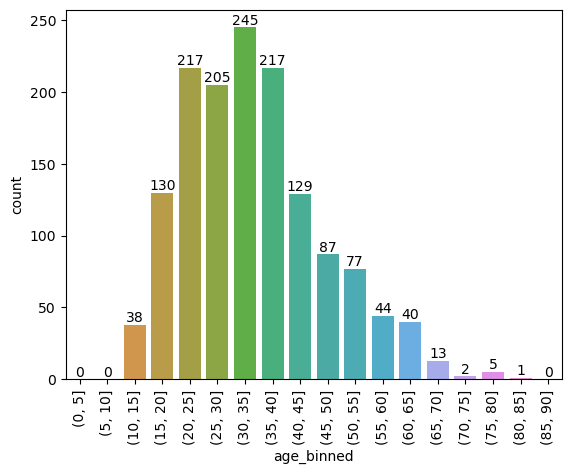

In [38]:
ax = sns.countplot(data=df[df['share_tap_flg'] == 1], x='age_binned')
ax.bar_label(ax.containers[0])
ax.tick_params(axis='x', labelrotation=90)

In [ ]:
30-35, 245

## Задание 2 [5 баллов]

* Кто чаще ставит лайки сторис: пользователи, которые находятся внутри страны (inside_country),или пользователи за её пределами(outside_country)?
В ответе укажите, кто ставит лайки чаще, а также укажите долю лайков от общего количества показанных сторис для данной группы (округлите проценты до тысячных).
#### Формат ответа:
outside_country; 20.012



In [17]:
df['in_or_out_country'] = df.apply(lambda x: 'inside_country' if x['geo_country'] == 'RU' else 'outside_country', axis=1)

In [18]:
count_max = df.groupby(by=['in_or_out_country']).like_tap_flg.sum().sort_values(ascending=False).head(1)


In [19]:
df[df['like_tap_flg'] == 1].user_id.count()

4524

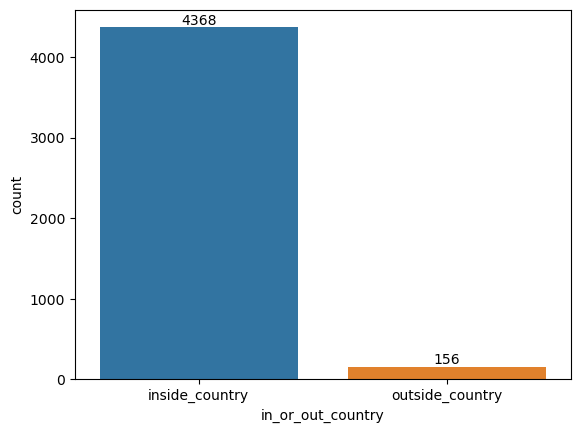

In [20]:
ax = sns.countplot(data=df[df['like_tap_flg'] == 1], x='in_or_out_country')
ax.bar_label(ax.containers[0])
ax.tick_params(axis='x')

In [21]:
count_all = df[df['in_or_out_country'] == 'inside_country']['user_id'].count()

In [23]:
count_max * 100 / count_all

in_or_out_country
inside_country    0.701739
Name: like_tap_flg, dtype: float64

In [32]:
round(count_max * 100 / count_all, 3)

in_or_out_country
inside_country    0.702
Name: like_tap_flg, dtype: float64

## Задание 3 [5 баллов]

* Назовите краткое название сторис (поле name), которая показала наибольшую конверсию в категорию "любимые" (т.е. были добавлены в закладки пользователями - favorite_tap_flg). При выборе анализируйте только те сторис, которые были показаны более, чем 100 раз.



In [44]:
df[df.groupby(by=['name']).favorite_tap_flg.transform('count') > 100].groupby(by=['name']).favorite_tap_flg.sum().sort_values(ascending=False).head(1)

name
Сделайте  напиток  из эспрессо    49
Name: favorite_tap_flg, dtype: int64

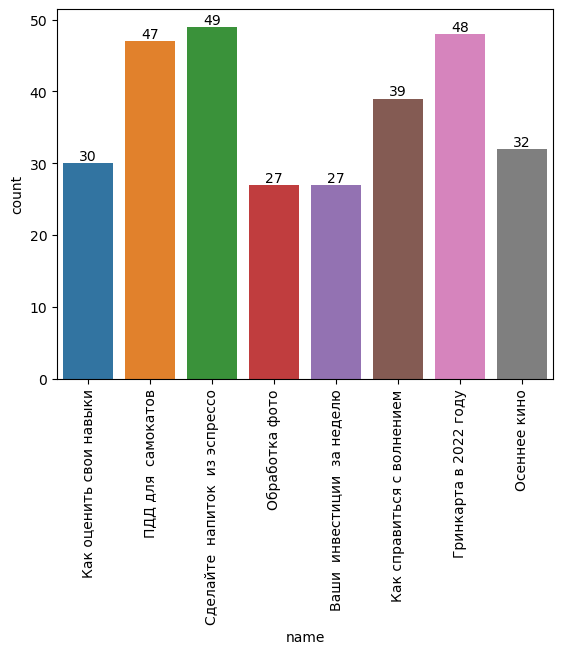

In [42]:
ax = sns.countplot(data=df[(df.groupby(by=['name']).favorite_tap_flg.transform('count') > 100) 
                           & (df['favorite_tap_flg'] == 1) 
                           & (df.groupby(by=['name']).favorite_tap_flg.transform('sum') > df[df.groupby(by=['name']).favorite_tap_flg.transform('count') > 100].groupby(by=['name']).favorite_tap_flg.sum().sort_values(ascending=False).head(10).min())],
                   x='name')
ax.bar_label(ax.containers[0])
ax.tick_params(axis='x', labelrotation=90)

## Задание 4 [10 баллов] 

* Найдите название истории, в которой в зависимости от региона разброс доли просмотров максимальный и выведите эти топ-три таких регионов




## Задание 5 [10 баллов]

* Постройте распределение клиентов в зависимости от возраста, типа устройства и типа операционной системы 
* Ответьте на вопрос: "Как меняется в зависимости от возраста число клиентов с каждым типом операционной системы и типом устройства?"

In [45]:
df['os'].value_counts()

os
Android    337705
iOS        307016
iPadOS       1049
Unknown       100
Windows         1
Name: count, dtype: int64

In [46]:
df[df['os'] == 'Unknown']

,user_id,date_,prosmotr,story_id,age,device_type,app_or_web,browser,os,gender,...,geo_city,day_of_week,user_hour,button_tap_flg,like_tap_flg,share_tap_flg,favorite_tap_flg,name,age_range,inside_country
3539,33172cbe59e4830765a478dc2ae287f3e42a822e96ab8d...,2022-10-16,1,17281,15,HIGHEND_PHONE,APP,Mobile Safari,Unknown,F,...,NaN,"3,0","15,0",0,0,0,0,NaN,NaN,True
10770,0740d047505b44d257c6bbbd8c20770698491ef399be19...,2022-10-16,1,12401,51,HIGHEND_PHONE,APP,Mobile Safari,Unknown,F,...,Армавир,"5,0","9,0",0,0,0,0,Траты на такси,"(50.0, 55.0]",True
12283,3c2433962350e869aca630ce16361c4c241dba7f24595c...,2022-10-16,1,15989,31,HIGHEND_PHONE,APP,Mobile Safari,Unknown,M,...,Москва,"5,0","14,0",0,0,0,0,NaN,"(30.0, 35.0]",True
27230,89bcbd2bb7a7e1d89d8204c32deac339932ceafc8aebae...,2022-10-16,1,12399,29,HIGHEND_PHONE,APP,Mobile Safari,Unknown,M,...,Геленджик,"5,0","17,0",0,0,0,0,Частые траты,"(25.0, 30.0]",True
46248,4d48caba4ee8c3013465c07e62721ebf55cab21a335e5d...,2022-10-16,1,17281,58,HIGHEND_PHONE,APP,Mobile Safari,Unknown,F,...,Москва,"4,0","15,0",1,0,0,0,NaN,"(55.0, 60.0]",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628427,304093457f50d5b53d036fd848683ea25135340e2c2841...,2022-10-16,1,20549,54,HIGHEND_PHONE,APP,Mobile Safari,Unknown,M,...,Балашиха,"5,0","11,0",0,0,0,0,Как скрасить осень,"(50.0, 55.0]",True
630389,e360d69aca2f6fc7d5583105e5f4b1e336f39881ce7a75...,2022-10-16,1,15989,30,HIGHEND_PHONE,APP,Mobile Safari,Unknown,M,...,Москва,"5,0","7,0",0,0,0,0,NaN,"(25.0, 30.0]",True
641757,591997eeff2eddb533ba3d2749da268cd52c43c3101160...,2022-10-16,1,15989,25,HIGHEND_PHONE,APP,Mobile Safari,Unknown,M,...,Улан-Удэ,"5,0","19,0",0,0,0,0,NaN,"(20.0, 25.0]",True
644202,6e5df62a0b36228de16f7f5f8cd36c910f3b59435704f4...,2022-10-16,1,17281,16,HIGHEND_PHONE,APP,Mobile Safari,Unknown,M,...,Кызыл,"4,0","7,0",1,0,0,0,NaN,"(15.0, 20.0]",True


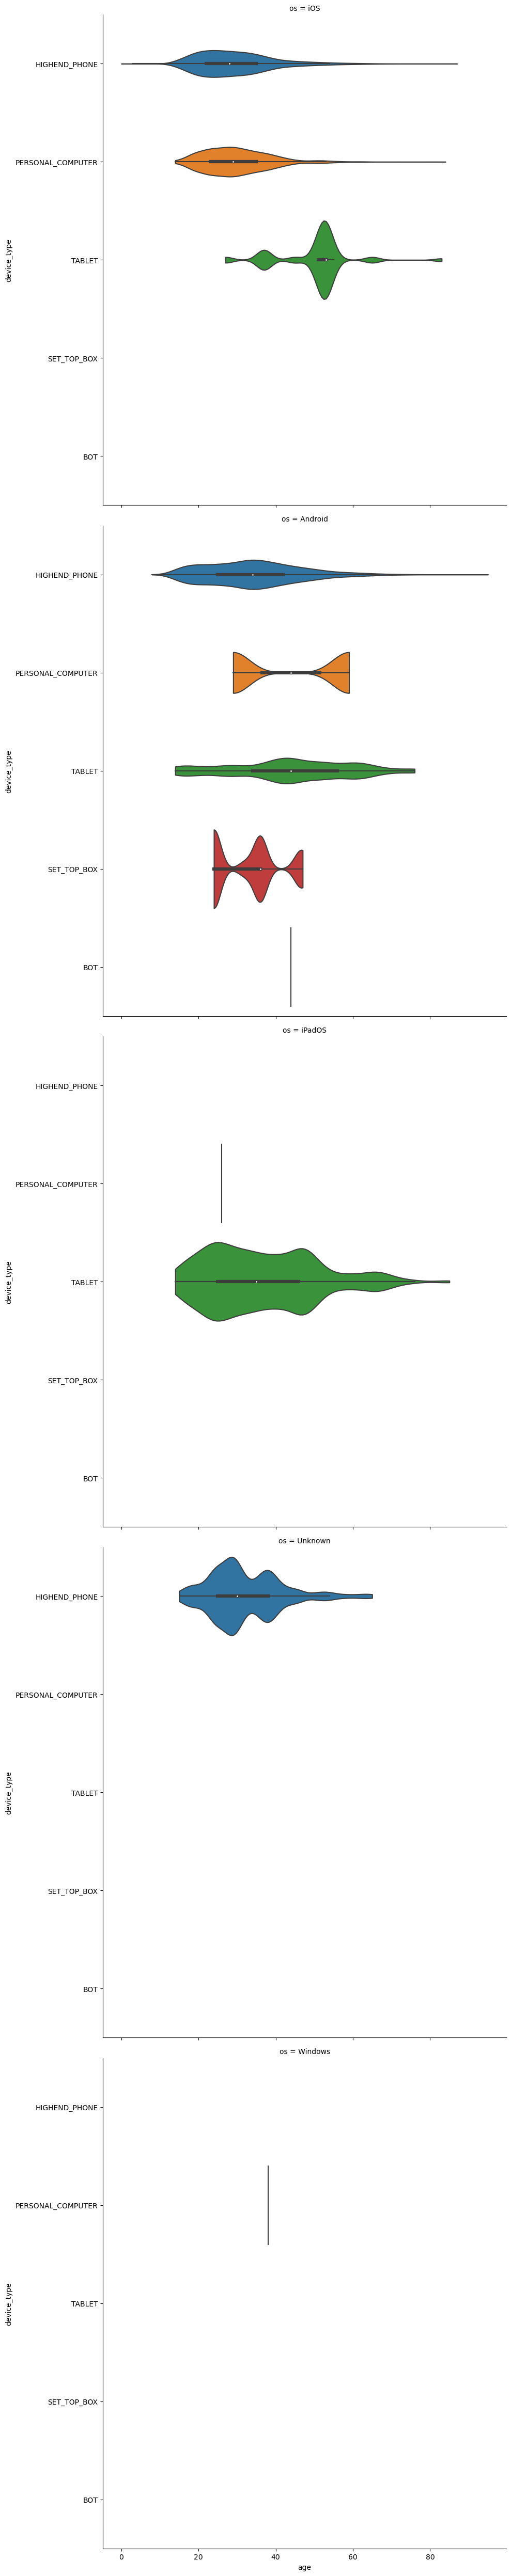

In [40]:
sns.catplot(x="age", y="device_type", col="os",
            data=df,
            orient="h", height=10, aspect=1,  col_wrap=1,
            kind="violin", dodge=True, cut=0, bw=.2)

## Задание 6 [15 баллов] 

#### Представьте что вы аналитик сторис. 
* Определите категорию клиентов, у которых будет самая большая конверсия в лайк при запуске новой истории по тратам?
* В какие дни эта история будет максимально эффективной и почему?


In [84]:
df_6 = df.dropna()
df_6 = df_6[df_6['name'].str.contains('траты', regex=False)]

In [88]:
df_6 

,user_id,date_,prosmotr,story_id,age,device_type,app_or_web,browser,os,gender,...,day_of_week,user_hour,button_tap_flg,like_tap_flg,share_tap_flg,favorite_tap_flg,name,in_or_out_country,age_binned,cat_name
23,fbdeea31f801627c213856eb12c41173786f754a886baf...,2022-10-16,1,12739,28,HIGHEND_PHONE,APP,Mobile Safari,iOS,M,...,"7,0","19,0",0,0,0,0,Ваши траты на продукты,inside_country,"(25, 30]",1
60,33bde777d0d97173eb28dd55faa85dec7d6c0cb8b0929c...,2022-10-16,1,12399,17,HIGHEND_PHONE,APP,Mobile Safari,iOS,M,...,"7,0","19,0",0,0,0,0,Частые траты,inside_country,"(15, 20]",1
61,6542714c9a5055360d7b515d55fdeae5746e7626560a17...,2022-10-18,1,12739,44,HIGHEND_PHONE,APP,Unknown Android App,Android,F,...,"7,0","15,0",0,0,0,0,Ваши траты на продукты,inside_country,"(40, 45]",1
62,43ae82e794dff2845ba5a5af7f7d88101bb4bfa9ac4b4e...,2022-10-21,1,12399,26,HIGHEND_PHONE,APP,Mobile Safari,iOS,M,...,"5,0","9,0",0,0,0,0,Частые траты,outside_country,"(25, 30]",1
69,a4217e8309f384b6c98b020f71165d625b3cd5ecf0523b...,2022-10-22,1,12399,22,HIGHEND_PHONE,APP,Unknown Android App,Android,F,...,"6,0","15,0",0,0,0,0,Частые траты,inside_country,"(20, 25]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645846,e4f7970c8622f719a218ab033b5379eafef39f3fa64189...,2022-10-20,1,12399,71,HIGHEND_PHONE,APP,Mobile Safari,iOS,F,...,"2,0","19,0",0,0,0,0,Частые траты,inside_country,"(70, 75]",1
645864,1069268b993ad96c62d06fce5039d4286976c63c0c8fb1...,2022-10-22,1,12399,18,HIGHEND_PHONE,APP,Mobile Safari,iOS,F,...,"5,0","14,0",0,0,0,0,Частые траты,inside_country,"(15, 20]",1
645867,5944abb9d7adb1952d1c9abb2d33b7b46e076695851fed...,2022-10-21,1,12399,32,HIGHEND_PHONE,APP,Unknown Android App,Android,M,...,"5,0","13,0",0,0,0,0,Частые траты,inside_country,"(30, 35]",1
645870,0d60d88a1ac1c81684d7494bac5766acba0a9cc33fde39...,2022-10-21,1,12739,25,HIGHEND_PHONE,APP,Mobile Safari,iOS,F,...,"3,0","20,0",0,0,0,0,Ваши траты на продукты,inside_country,"(20, 25]",1


In [90]:
df_6.groupby(by=['age_binned']).like_tap_flg.sum()

age_binned
(0, 5]       0
(5, 10]      0
(10, 15]     5
(15, 20]    18
(20, 25]    20
(25, 30]    18
(30, 35]    27
(35, 40]    12
(40, 45]    11
(45, 50]    12
(50, 55]     4
(55, 60]     3
(60, 65]     1
(65, 70]     1
(70, 75]     1
(75, 80]     0
(80, 85]     0
(85, 90]     0
Name: like_tap_flg, dtype: int64

In [89]:
df_6.groupby('age_binned').agg({'age_binned': "count"})['age_binned']

age_binned
(0, 5]         1
(5, 10]        0
(10, 15]     829
(15, 20]    4880
(20, 25]    6828
(25, 30]    6531
(30, 35]    6635
(35, 40]    4709
(40, 45]    2759
(45, 50]    1683
(50, 55]    1056
(55, 60]     587
(60, 65]     350
(65, 70]     175
(70, 75]      65
(75, 80]      14
(80, 85]       9
(85, 90]       3
Name: age_binned, dtype: int64

In [91]:
(df_6.groupby(by=['age_binned']).like_tap_flg.sum() / df_6.groupby('age_binned').agg({'age_binned': "count"})['age_binned'] ) * 1000

age_binned
(0, 5]       0.000000
(5, 10]           NaN
(10, 15]     6.031363
(15, 20]     3.688525
(20, 25]     2.929115
(25, 30]     2.756086
(30, 35]     4.069329
(35, 40]     2.548312
(40, 45]     3.986952
(45, 50]     7.130125
(50, 55]     3.787879
(55, 60]     5.110733
(60, 65]     2.857143
(65, 70]     5.714286
(70, 75]    15.384615
(75, 80]     0.000000
(80, 85]     0.000000
(85, 90]     0.000000
dtype: float64

In [94]:
df_3 = df_6[(df_6['age'] > 70) &  (df_6['age'] <= 75)]

<Axes: ylabel='day_of_week'>

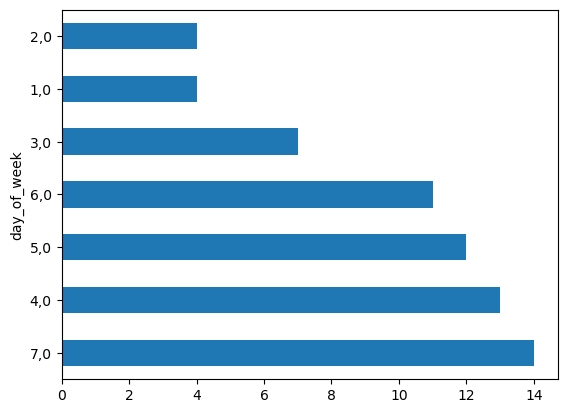

In [95]:
df_3.day_of_week.value_counts().plot(kind='barh')

## Задание 7 [50 баллов] 
* Определите тематики и сгруппируйте сторис по ним.
* Определите топ-5 метрик для каждой тематики, которые будут описывать целевые группы пользователей и их взаимодействие со сторисами из данной группы.


In [70]:
df.groupby(by=['name']).name.count().sort_values(ascending=False).head(40)

name
Страхи в начале бизнеса             22971
Частые траты                        19412
Ваши траты на продукты              16292
ПДД для  самокатов                  12791
Больше  в ленте  «Для вас»           9370
Ваши  инвестиции  за неделю          8921
Сделайте  напиток  из эспрессо       7079
Ваши траты на авто                   6797
Топ-6 историй                        6722
Ваши  письма  в прошлое              6439
Как скрасить осень                   6180
Новые  статьи  для вас               5590
Как помочь  пожилым  людям           5303
Траты на такси                       5165
Странные научные опыты               4727
Как  перехитрить  мошенников         4669
Гринкарта в 2022 году                4420
Китайских  акций стало  больше       4265
Новости  про деньги  28 октября      4240
Бесплатные  переводы  в СНГ          4171
Чьи это строки?                      4144
Бесплатные переводы в СНГ            4086
Нобелевская премия по экономике      4081
1000   за друга              

In [73]:
def categort_name(name):
    if type(name) != str:
        return 0
    name = name.lower()
    if 'траты' in name:
        return 1
    elif '?' in name:
        return 2
    elif 'как' in name:
        return 3
    elif 'топ' in name:
        return 4
    else:
        return 5

In [74]:
df['cat_name'] = df['name'].map(categort_name)

<Axes: xlabel='cat_name'>

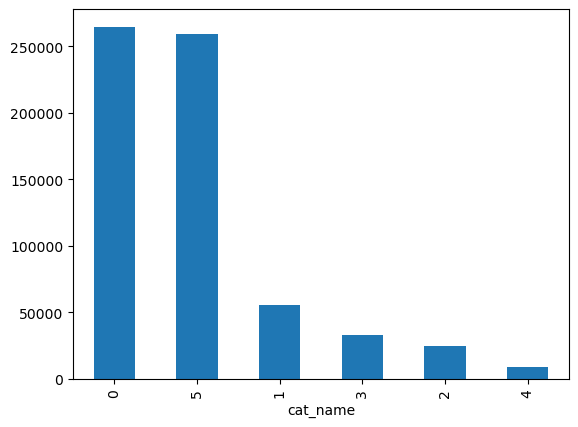

In [76]:
df.cat_name.value_counts().plot(kind="bar")

,user_id,date_,prosmotr,story_id,age,device_type,app_or_web,browser,os,gender,geo_country,geo_region,geo_city,day_of_week,user_hour,button_tap_flg,like_tap_flg,share_tap_flg,favorite_tap_flg,name
0,7143ce74749c9d588e3bef0a43260a2cdc5f29ba9e020d...,2022-10-16,1,17281,29,HIGHEND_PHONE,APP,Mobile Safari,iOS,M,RU,MOW,Москва,"6,0","15,0",1,0,0,0,NaN
1,5ab91653f362eb92a4f1c4148aff76c5145f40d3fbd8c7...,2022-10-20,1,11626,24,HIGHEND_PHONE,APP,Mobile Safari,iOS,M,RU,LEN,NaN,"4,0","12,0",0,0,0,0,Ваша карта Tinkoff Black
2,4843a90a104d5b37e2db0c961dafb94c4a0d6ef40254f8...,2022-10-16,1,19778,30,HIGHEND_PHONE,APP,Unknown MIUI Browser,Android,F,RU,ORL,Орёл,"7,0","15,0",0,0,0,0,Ваши письма в прошлое
3,17e7d4120c85e408dbc595ab0b4cb2ab635533ab2b0766...,2022-10-18,1,20879,50,HIGHEND_PHONE,APP,Mobile Safari,iOS,M,RU,TOM,Стрежевой,"2,0","6,0",0,0,0,0,NaN
4,40d07976dfb816a26ee87dc4289dea4e19f8522b3cab67...,2022-10-21,1,20460,19,HIGHEND_PHONE,APP,Unknown Android App,Android,M,RU,IRK,Черемхово,"5,0","11,0",0,0,0,0,NaN
